In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#conda install -c conda-forge ambertools

In [ ]:
#conda update -n base -c defaults conda

In [11]:
# Writes ccptraj script
def write_cpptraj_script (name, parmtop, trajectory, protein_length, window):
    # this subroutine writes a script for execution by cpptraj 
    f = open(name+"_distance_"+str(window)+".cpptraj", "w")
    f.write("parm ")
    f.write(parmtop)
    f.write("\n")
    f.write("trajin ")
    f.write(trajectory)
    f.write("\n")
    #f.write("resinfo out resinfo.txt")
    #f.write("\n")
    upper_limit = protein_length + 1 - window #max protein length + 1
    for x in range (1,upper_limit):
        f.write("distance :")
        f.write(str(x))
        f.write(" :")
        f.write(str(x + window))
        f.write(" out ")
        f.write(name)
        f.write(".lccdata")
        f.write("\n")
    f.close()

## Read in prmtop and tractory data and execute internal distance measurements

In [8]:
%%capture
protein_length=70
window = 20
write_cpptraj_script("myc_091-160_D132-H", "myc_091-160_D132-H_stripped.prmtop", "aMD_091-160_D132-H_no1-4_stripped.nc", protein_length, window)
#!cpptraj < distance.cpptraj
#!rm distance.cpptraj

In [12]:
%%capture
protein_length=70

window_range = list(range(2,51))

for window in window_range:
    write_cpptraj_script("wildtype_{}".format(window), "myc_091-160_stripped.prmtop", "aMD_091-160_no1-4_stripped.nc", protein_length, window)
    write_cpptraj_script("myc_091-160_D132-H_{}".format(window), "myc_091-160_D132-H_stripped.prmtop", "aMD_091-160_D132-H_no1-4_stripped.nc", protein_length, window)

In [ ]:
for window in window_range:
    !cpptraj < 'wildtype_{}_distance_{}.cpptraj'.format(window, window)
#!cpptraj < wildtype_5_distance_5.cpptraj
#!rm distance.cpptraj

## Visualization of the Local Compation Plot
The intensity of the LCC curves is controlled by the number of frames read in 
(currently only every tenth frame - see last number in the for loop command in line 7) and by the intesity setting (alpha in line 9; note that alpha = 0.002 is the lowest possible setting). 
Reading in too many frames, or setting the alpha value too high, will yield a rather dark plot that does not show any detailed features. 

Number of trajectory frames read in:  40000


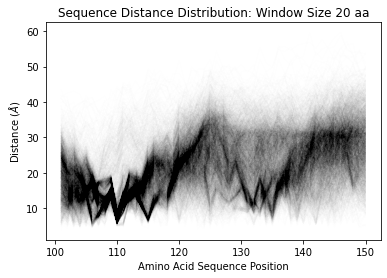

In [10]:
mutant_1_data = np.loadtxt('1_mutant_D132-H.lcc')
frame_number = mutant_1_data.shape[0] #get the number of frames read
print ("Number of trajectory frames read in: ", frame_number)
upper_limit = 70 + 1 - window #max protein length + 1
x = np.arange(1 + window / 2 ,upper_limit + window / 2) + 90
plt.clf()
for z in range (1,frame_number,10):
    y=mutant_1_data[z] #read row for distances along primary sequence    
    plt.plot(x,y[1:frame_number], color = 'black', alpha=0.002) #avoid reading header in y

plt.xlabel('Amino Acid Sequence Position')  
plt.ylabel('Distance ($\AA$)')  #Angstrom
plot_name = 'Sequence Distance Distribution: Window Size ' + str(window) + ' aa'
plt.title(plot_name) 
figure_name = "local_compaction_plot_" + str(window) + ".png"
plt.savefig(figure_name, dpi = 300)
plt.show()

Number of trajectory frames read in:  40000


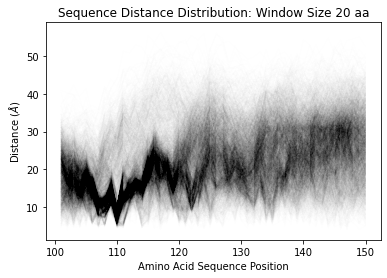

In [9]:
wildtype_data = np.loadtxt('0_wildtype.lcc')
frame_number = wildtype_data.shape[0] #get the number of frames read
print ("Number of trajectory frames read in: ", frame_number)
upper_limit = 70 + 1 - window #max protein length + 1
x = np.arange(1 + window / 2 ,upper_limit + window / 2) + 90
plt.clf()
for z in range (1,frame_number,10):
    y=wildtype_data[z] #read row for distances along primary sequence    
    plt.plot(x,y[1:frame_number], color = 'black', alpha=0.002) #avoid reading header in y

plt.xlabel('Amino Acid Sequence Position')  
plt.ylabel('Distance ($\AA$)')  #Angstrom
plot_name = 'Sequence Distance Distribution: Window Size ' + str(window) + ' aa'
plt.title(plot_name) 
figure_name = "local_compaction_plot_" + str(window) + ".png"
plt.savefig(figure_name, dpi = 300)
plt.show()

## LCC data for distinct window sizes
***

In [35]:
def write_cpptraj_script (name, parmtop, trajectory, protein_length, window):
    # this subroutine writes a script for execution by cpptraj 
    f = open(name+"_distance_"+str(window)+".cpptraj", "w")
    f.write("parm ")
    f.write(parmtop)
    f.write("\n")
    f.write("trajin ")
    f.write(trajectory)
    f.write("\n")
    #f.write("resinfo out resinfo.txt")
    #f.write("\n")
    upper_limit = protein_length + 1 - window #max protein length + 1
    for x in range (1,upper_limit):
        f.write("distance :")
        f.write(str(x))
        f.write(" :")
        f.write(str(x + window))
        f.write(" out ")
        f.write(name)
        f.write(".lccdata")
        f.write("\n")
    f.close()

***
#### Window size: 5

In [6]:
%%capture
protein_length=70

window_range = list(range(2,51))

for window in window_range:
    write_cpptraj_script("wildtype_"+str(window), "myc_091-160_stripped.prmtop", "aMD_091-160_no1-4_stripped.nc", protein_length, window)
    write_cpptraj_script("myc_091-160_D132-H_"+str(window), "myc_091-160_D132-H_stripped.prmtop", "aMD_091-160_D132-H_no1-4_stripped.nc", protein_length, window)

In [62]:
for window in window_range:
    !cpptraj < wildtype_{}_distance_{}.
!cpptraj < wildtype_5_distance_5.cpptraj
#!rm distance.cpptraj


CPPTRAJ: Trajectory Analysis. V4.14.0 (AmberTools V19.00)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 03/25/22 18:01:05
| Available memory: 1.838 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :6 out wildtype_5.lccdata]
    DISTANCE: :1 to :6, center of mass.
  [distance :2 :7 out wildtype_5.lccdata]
    DISTANCE: :2 to :7, center of mass.
  [distance :3 :8 out wildtype_5.lccdata]
    DISTANCE: :3 to :8, center of mass.
  [distance :4 :9 out wildtype_5.lccdata]
    DISTANCE: :4 to :9, center of mass.
  [distance :5 :10 out wildtype_5.lccdata]
    DISTANCE: :5 to :10, center of mass.
  [distance :6 :11 out wildtype_5.lccdata]
    DISTANCE: :6 to :11, center of mass.
  [distance :7 :12 out wildtype_5.lccdata]
  

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 37888.0446 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (65 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

In [65]:
!cpptraj < myc_091-160_D132-H_5_distance_5.cpptraj
#!rm distance.cpptraj


CPPTRAJ: Trajectory Analysis. V4.14.0 (AmberTools V19.00)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 03/25/22 18:01:33
| Available memory: 1.802 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :6 out myc_091-160_D132-H_5.lccdata]
    DISTANCE: :1 to :6, center of mass.
  [distance :2 :7 out myc_091-160_D132-H_5.lccdata]
    DISTANCE: :2 to :7, center of mass.
  [distance :3 :8 out myc_091-160_D132-H_5.lccdata]
    DISTANCE: :3 to :8, center of mass.
  [distance :4 :9 out myc_091-160_D132-H_5.lccdata]
    DISTANCE: :4 to :9, center of mass.
  [distance :5 :10 out myc_091-160_D132-H_5.lccdata]
    DISTANCE: :5 to :10, center of mass.
  [distance :6 :11 out myc_091-160_D132-H_5.lccdata

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 38785.0204 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (65 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

Appears to be uninformative as too much structure - but likely just because window size is very small.

***
#### Window size: 10

In [35]:
def write_cpptraj_script (name, parmtop, trajectory, protein_length, window):
    # this subroutine writes a script for execution by cpptraj 
    f = open(name+"_distance_"+str(window)+".cpptraj", "w")
    f.write("parm ")
    f.write(parmtop)
    f.write("\n")
    f.write("trajin ")
    f.write(trajectory)
    f.write("\n")
    #f.write("resinfo out resinfo.txt")
    #f.write("\n")
    upper_limit = protein_length + 1 - window #max protein length + 1
    for x in range (1,upper_limit):
        f.write("distance :")
        f.write(str(x))
        f.write(" :")
        f.write(str(x + window))
        f.write(" out ")
        f.write(name)
        f.write(".lccdata")
        f.write("\n")
    f.close()

In [38]:
%%capture
protein_length=70
window = 10
write_cpptraj_script("wildtype_10", "myc_091-160_stripped.prmtop", "aMD_091-160_no1-4_stripped.nc", protein_length, window)
write_cpptraj_script("myc_091-160_D132-H_10", "myc_091-160_D132-H_stripped.prmtop", "aMD_091-160_D132-H_no1-4_stripped.nc", protein_length, window)


In [40]:
!cpptraj < wildtype_10_distance_10.cpptraj
#!rm distance.cpptraj


CPPTRAJ: Trajectory Analysis. V4.14.0 (AmberTools V19.00)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 03/25/22 17:26:56
| Available memory: 6.043 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :11 out wildtype_10.lccdata]
    DISTANCE: :1 to :11, center of mass.
  [distance :2 :12 out wildtype_10.lccdata]
    DISTANCE: :2 to :12, center of mass.
  [distance :3 :13 out wildtype_10.lccdata]
    DISTANCE: :3 to :13, center of mass.
  [distance :4 :14 out wildtype_10.lccdata]
    DISTANCE: :4 to :14, center of mass.
  [distance :5 :15 out wildtype_10.lccdata]
    DISTANCE: :5 to :15, center of mass.
  [distance :6 :16 out wildtype_10.lccdata]
    DISTANCE: :6 to :16, center of mass.
  [distance :7 :17 out wildtype

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 34335.8250 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (60 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

In [41]:
!cpptraj < myc_091-160_D132-H_10_distance_10.cpptraj
#!rm distance.cpptraj


CPPTRAJ: Trajectory Analysis. V4.14.0 (AmberTools V19.00)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 03/25/22 17:27:54
| Available memory: 6.017 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :11 out myc_091-160_D132-H_10.lccdata]
    DISTANCE: :1 to :11, center of mass.
  [distance :2 :12 out myc_091-160_D132-H_10.lccdata]
    DISTANCE: :2 to :12, center of mass.
  [distance :3 :13 out myc_091-160_D132-H_10.lccdata]
    DISTANCE: :3 to :13, center of mass.
  [distance :4 :14 out myc_091-160_D132-H_10.lccdata]
    DISTANCE: :4 to :14, center of mass.
  [distance :5 :15 out myc_091-160_D132-H_10.lccdata]
    DISTANCE: :5 to :15, center of mass.
  [distance :6 :16 out myc_091-160_D13

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 42126.9918 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (60 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

***
#### Window size: 15

In [48]:
%%capture
protein_length=70
window = 15
write_cpptraj_script("wildtype_"+str(window), "myc_091-160_stripped.prmtop", "aMD_091-160_no1-4_stripped.nc", protein_length, window)
write_cpptraj_script("myc_091-160_D132-H_"+str(window), "myc_091-160_D132-H_stripped.prmtop", "aMD_091-160_D132-H_no1-4_stripped.nc", protein_length, window)

In [49]:
!cpptraj < wildtype_15_distance_15.cpptraj
#!rm distance.cpptraj


CPPTRAJ: Trajectory Analysis. V4.14.0 (AmberTools V19.00)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 03/25/22 17:46:56
| Available memory: 1.770 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :16 out wildtype_15.lccdata]
    DISTANCE: :1 to :16, center of mass.
  [distance :2 :17 out wildtype_15.lccdata]
    DISTANCE: :2 to :17, center of mass.
  [distance :3 :18 out wildtype_15.lccdata]
    DISTANCE: :3 to :18, center of mass.
  [distance :4 :19 out wildtype_15.lccdata]
    DISTANCE: :4 to :19, center of mass.
  [distance :5 :20 out wildtype_15.lccdata]
    DISTANCE: :5 to :20, center of mass.
  [distance :6 :21 out wildtype_15.lccdata]
    DISTANCE: :6 to :21, center of mass.
  [distance :7 :22 out wildtype

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 38381.0121 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (55 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

In [50]:
!cpptraj < myc_091-160_D132-H_15_distance_15.cpptraj
#!rm distance.cpptraj


CPPTRAJ: Trajectory Analysis. V4.14.0 (AmberTools V19.00)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 03/25/22 17:47:25
| Available memory: 1.743 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :16 out myc_091-160_D132-H_15.lccdata]
    DISTANCE: :1 to :16, center of mass.
  [distance :2 :17 out myc_091-160_D132-H_15.lccdata]
    DISTANCE: :2 to :17, center of mass.
  [distance :3 :18 out myc_091-160_D132-H_15.lccdata]
    DISTANCE: :3 to :18, center of mass.
  [distance :4 :19 out myc_091-160_D132-H_15.lccdata]
    DISTANCE: :4 to :19, center of mass.
  [distance :5 :20 out myc_091-160_D132-H_15.lccdata]
    DISTANCE: :5 to :20, center of mass.
  [distance :6 :21 out myc_091-160_D13

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 41119.5623 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (55 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

***
#### Window size: 25

In [68]:
%%capture
protein_length=70
window = 25
write_cpptraj_script("wildtype_"+str(window), "myc_091-160_stripped.prmtop", "aMD_091-160_no1-4_stripped.nc", protein_length, window)
write_cpptraj_script("myc_091-160_D132-H_"+str(window), "myc_091-160_D132-H_stripped.prmtop", "aMD_091-160_D132-H_no1-4_stripped.nc", protein_length, window)


In [69]:
!cpptraj < wildtype_25_distance_25.cpptraj
#!rm distance.cpptraj


CPPTRAJ: Trajectory Analysis. V4.14.0 (AmberTools V19.00)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 03/25/22 18:08:08
| Available memory: 1.737 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :26 out wildtype_25.lccdata]
    DISTANCE: :1 to :26, center of mass.
  [distance :2 :27 out wildtype_25.lccdata]
    DISTANCE: :2 to :27, center of mass.
  [distance :3 :28 out wildtype_25.lccdata]
    DISTANCE: :3 to :28, center of mass.
  [distance :4 :29 out wildtype_25.lccdata]
    DISTANCE: :4 to :29, center of mass.
  [distance :5 :30 out wildtype_25.lccdata]
    DISTANCE: :5 to :30, center of mass.
  [distance :6 :31 out wildtype_25.lccdata]
    DISTANCE: :6 to :31, center of mass.
  [distance :7 :32 out wildtype

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 48888.9378 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (45 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

In [70]:
!cpptraj < myc_091-160_D132-H_25_distance_25.cpptraj
#!rm distance.cpptraj


CPPTRAJ: Trajectory Analysis. V4.14.0 (AmberTools V19.00)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 03/25/22 18:08:17
| Available memory: 1.709 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :26 out myc_091-160_D132-H_25.lccdata]
    DISTANCE: :1 to :26, center of mass.
  [distance :2 :27 out myc_091-160_D132-H_25.lccdata]
    DISTANCE: :2 to :27, center of mass.
  [distance :3 :28 out myc_091-160_D132-H_25.lccdata]
    DISTANCE: :3 to :28, center of mass.
  [distance :4 :29 out myc_091-160_D132-H_25.lccdata]
    DISTANCE: :4 to :29, center of mass.
  [distance :5 :30 out myc_091-160_D132-H_25.lccdata]
    DISTANCE: :5 to :30, center of mass.
  [distance :6 :31 out myc_091-160_D13

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 42269.3126 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (45 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

***
#### Window size: 30

In [72]:
%%capture
protein_length=70
window = 30
write_cpptraj_script("wildtype_"+str(window), "myc_091-160_stripped.prmtop", "aMD_091-160_no1-4_stripped.nc", protein_length, window)
write_cpptraj_script("myc_091-160_D132-H_"+str(window), "myc_091-160_D132-H_stripped.prmtop", "aMD_091-160_D132-H_no1-4_stripped.nc", protein_length, window)


In [73]:
!cpptraj < wildtype_30_distance_30.cpptraj
#!rm distance.cpptraj


CPPTRAJ: Trajectory Analysis. V4.14.0 (AmberTools V19.00)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 03/25/22 18:11:24
| Available memory: 1.667 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :31 out wildtype_30.lccdata]
    DISTANCE: :1 to :31, center of mass.
  [distance :2 :32 out wildtype_30.lccdata]
    DISTANCE: :2 to :32, center of mass.
  [distance :3 :33 out wildtype_30.lccdata]
    DISTANCE: :3 to :33, center of mass.
  [distance :4 :34 out wildtype_30.lccdata]
    DISTANCE: :4 to :34, center of mass.
  [distance :5 :35 out wildtype_30.lccdata]
    DISTANCE: :5 to :35, center of mass.
  [distance :6 :36 out wildtype_30.lccdata]
    DISTANCE: :6 to :36, center of mass.
  [distance :7 :37 out wildtype

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 50409.3872 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (40 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

In [74]:
!cpptraj < myc_091-160_D132-H_30_distance_30.cpptraj
#!rm distance.cpptraj


CPPTRAJ: Trajectory Analysis. V4.14.0 (AmberTools V19.00)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 03/25/22 18:11:31
| Available memory: 1.650 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :31 out myc_091-160_D132-H_30.lccdata]
    DISTANCE: :1 to :31, center of mass.
  [distance :2 :32 out myc_091-160_D132-H_30.lccdata]
    DISTANCE: :2 to :32, center of mass.
  [distance :3 :33 out myc_091-160_D132-H_30.lccdata]
    DISTANCE: :3 to :33, center of mass.
  [distance :4 :34 out myc_091-160_D132-H_30.lccdata]
    DISTANCE: :4 to :34, center of mass.
  [distance :5 :35 out myc_091-160_D132-H_30.lccdata]
    DISTANCE: :5 to :35, center of mass.
  [distance :6 :36 out myc_091-160_D13

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 48197.2424 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (40 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di

***
#### Window size: 35

In [76]:
%%capture
protein_length=70
window = 35
write_cpptraj_script("wildtype_"+str(window), "myc_091-160_stripped.prmtop", "aMD_091-160_no1-4_stripped.nc", protein_length, window)
write_cpptraj_script("myc_091-160_D132-H_"+str(window), "myc_091-160_D132-H_stripped.prmtop", "aMD_091-160_D132-H_no1-4_stripped.nc", protein_length, window)

In [79]:
!cpptraj < wildtype_35_distance_35.cpptraj
#!rm distance.cpptraj


CPPTRAJ: Trajectory Analysis. V4.14.0 (AmberTools V19.00)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 03/25/22 18:14:46
| Available memory: 1.582 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_stripped.prmtop]
	Reading 'myc_091-160_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_no1-4_stripped.nc]
	Reading 'aMD_091-160_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :36 out wildtype_35.lccdata]
    DISTANCE: :1 to :36, center of mass.
  [distance :2 :37 out wildtype_35.lccdata]
    DISTANCE: :2 to :37, center of mass.
  [distance :3 :38 out wildtype_35.lccdata]
    DISTANCE: :3 to :38, center of mass.
  [distance :4 :39 out wildtype_35.lccdata]
    DISTANCE: :4 to :39, center of mass.
  [distance :5 :40 out wildtype_35.lccdata]
    DISTANCE: :5 to :40, center of mass.
  [distance :6 :41 out wildtype_35.lccdata]
    DISTANCE: :6 to :41, center of mass.
  [distance :7 :42 out wildtype


RUN TIMING:
TIME:		Init               : 0.0002 s (  0.01%)
TIME:		Trajectory Process : 0.7607 s ( 25.77%)
TIME:		Action Post        : 0.0000 s (  0.00%)
TIME:		Analysis           : 0.0000 s (  0.00%)
TIME:		Data File Write    : 2.1903 s ( 74.21%)
TIME:		Other              : 0.0001 s (  0.00%)
TIME:	Run Total 2.9513 s
---------- RUN END ---------------------------------------------------
TIME: Total execution time: 2.9635 seconds.
--------------------------------------------------------------------------------
To cite CPPTRAJ use:
Daniel R. Roe and Thomas E. Cheatham, III, "PTRAJ and CPPTRAJ: Software for
  Processing and Analysis of Molecular Dynamics Trajectory Data". J. Chem.
  Theory Comput., 2013, 9 (7), pp 3084-3095.



In [77]:
!cpptraj < myc_091-160_D132-H_35_distance_35.cpptraj
#!rm distance.cpptraj


CPPTRAJ: Trajectory Analysis. V4.14.0 (AmberTools V19.00)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 03/25/22 18:13:58
| Available memory: 1.598 GB

INPUT: Reading input from 'STDIN'
  [parm myc_091-160_D132-H_stripped.prmtop]
	Reading 'myc_091-160_D132-H_stripped.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin aMD_091-160_D132-H_no1-4_stripped.nc]
	Reading 'aMD_091-160_D132-H_no1-4_stripped.nc' as Amber NetCDF
  [distance :1 :36 out myc_091-160_D132-H_35.lccdata]
    DISTANCE: :1 to :36, center of mass.
  [distance :2 :37 out myc_091-160_D132-H_35.lccdata]
    DISTANCE: :2 to :37, center of mass.
  [distance :3 :38 out myc_091-160_D132-H_35.lccdata]
    DISTANCE: :3 to :38, center of mass.
  [distance :4 :39 out myc_091-160_D132-H_35.lccdata]
    DISTANCE: :4 to :39, center of mass.
  [distance :5 :40 out myc_091-160_D132-H_35.lccdata]
    DISTANCE: :5 to :40, center of mass.
  [distance :6 :41 out myc_091-160_D13

 0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% Complete.

Read 40000 frames and processed 40000 frames.
TIME: Avg. throughput= 53726.4678 frames / second.

ACTION OUTPUT:
TIME: Analyses took 0.0000 seconds.

DATASETS (35 total):
	Dis_00001 "Dis_00001" (double, distance), size is 40000 (320.000 kB)
	Dis_00002 "Dis_00002" (double, distance), size is 40000 (320.000 kB)
	Dis_00003 "Dis_00003" (double, distance), size is 40000 (320.000 kB)
	Dis_00004 "Dis_00004" (double, distance), size is 40000 (320.000 kB)
	Dis_00005 "Dis_00005" (double, distance), size is 40000 (320.000 kB)
	Dis_00006 "Dis_00006" (double, distance), size is 40000 (320.000 kB)
	Dis_00007 "Dis_00007" (double, distance), size is 40000 (320.000 kB)
	Dis_00008 "Dis_00008" (double, distance), size is 40000 (320.000 kB)
	Dis_00009 "Dis_00009" (double, distance), size is 40000 (320.000 kB)
	Dis_00010 "Dis_00010" (double, distance), size is 40000 (320.000 kB)
	Dis_00011 "Dis_00011" (double, distance), size is 40000 (320.000 kB)
	Di